In [13]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster
from colorthief import ColorThief
import glob
import numpy as np
import matplotlib.pyplot as plt


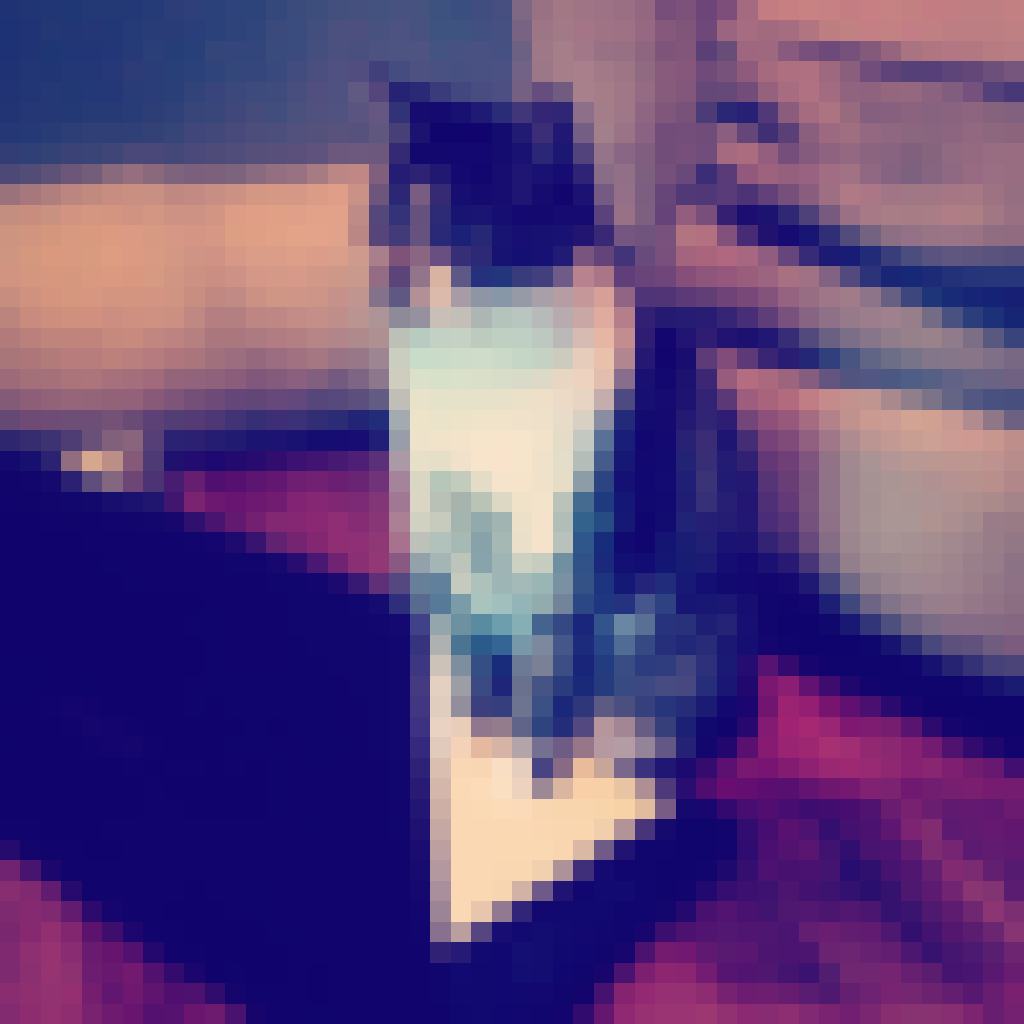

In [14]:
#https://stackoverflow.com/questions/47143332/how-to-pixelate-a-square-image-to-256-big-pixels-with-python
file = "sample_images/ginger_computer.png"
pixel_size = 50

img = Image.open("sample_images/ginger_computer.png")

# Resize smoothly down 
imgSmall = img.resize((pixel_size ,pixel_size ),resample=Image.BILINEAR)

# Scale back up using NEAREST to original size
result = imgSmall.resize(img.size,Image.NEAREST)

# Save
result.save(file.replace(".png", "_pixels_" + str(pixel_size) + ".png"))

result

In [15]:
result.width

1024

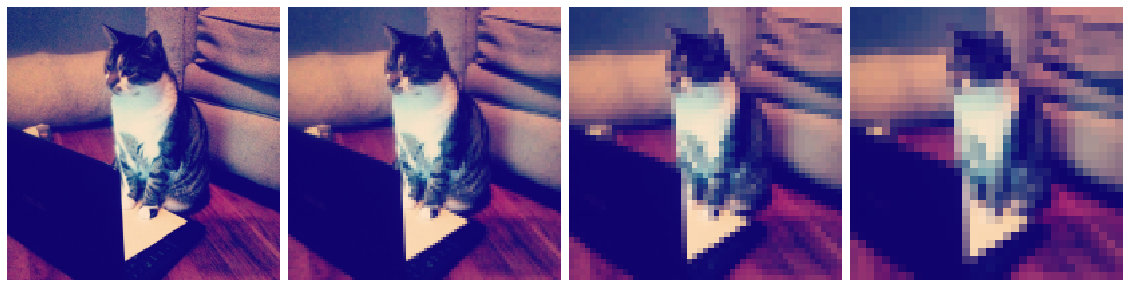

In [16]:


def pixelate_rgb(img, window):
    n, m, _ = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n, m, 3))
    for x in range(0, n, window):
        for y in range(0, m, window):
            img1[x:x+window,y:y+window] = img[x:x+window,y:y+window].mean(axis=(0,1))
    return img1

img = plt.imread(file)

fig, ax = plt.subplots(1, 4, figsize=(20,10))

ax[0].imshow(pixelate_rgb(img, 5))
ax[1].imshow(pixelate_rgb(img, 10))
ax[2].imshow(pixelate_rgb(img, 20))
ax[3].imshow(pixelate_rgb(img, 30))

# remove frames
[a.set_axis_off() for a in ax.flatten()]
plt.subplots_adjust(wspace=0.03, hspace=0)

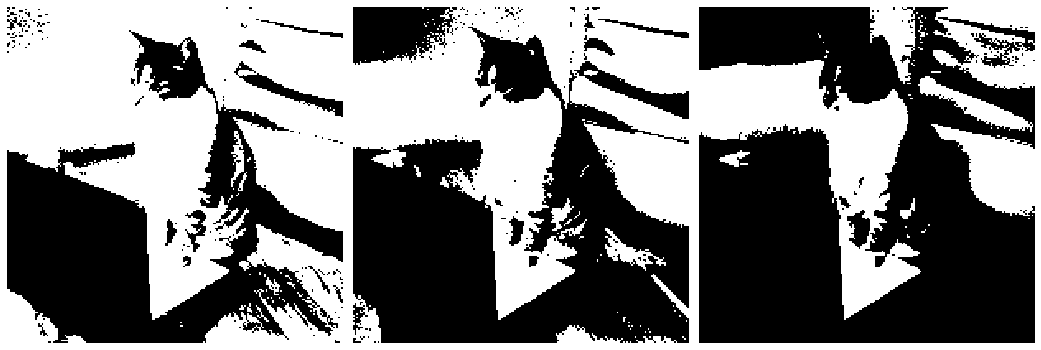

In [17]:
def pixelate_bin(img, window, threshold):
    n, m = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n,m))
    for x in range(0, n, window):
        for y in range(0, m, window):
            if img[x:x+window,y:y+window].mean() > threshold:
                img1[x:x+window,y:y+window] = 1
    return img1

# convert image to grayscale
img = np.dot(plt.imread(file), [0.299 , 0.587, 0.114])

fig, ax = plt.subplots(1, 3, figsize=(15,10))

plt.tight_layout()
ax[0].imshow(pixelate_bin(img, 5, .2), cmap='gray')
ax[1].imshow(pixelate_bin(img, 5, .3), cmap='gray')
ax[2].imshow(pixelate_bin(img, 5, .45), cmap='gray')

# remove frames
[a.set_axis_off() for a in ax.flatten()]
plt.subplots_adjust(wspace=0.03, hspace=0)

In [ ]:
def pixelate_rgb_color_list(img, window):
    n, m, _ = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n, m, 3))
    for x in range(0, n, window):
        for y in range(0, m, window):
            img1[x:x+window,y:y+window] = img[x:x+window,y:y+window].mean(axis=(0,1))
    return img1

### Nexus images and their dominant colors

In [ ]:
image_folder = "Nexus_Image_Iterator/"
image_files = glob.glob(image_folder+"*.png")
image_colors = []

for image_filename in image_files:
    color_thief = ColorThief(image_filename)
    # get the dominant color
    dominant_color = color_thief.get_color(quality=1)
    print(image_filename)
    palette = np.array([dominant_color])[np.newaxis, :, :]
    plt.imshow(palette);
    plt.axis('off');
    image_colors.append(dominant_color)
    

Nexus_Image_Iterator/full_sprial_grids_55_.png
Nexus_Image_Iterator/grid_sprial_test_3_.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_8_resized.png
Nexus_Image_Iterator/back_forth_grid_69_.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_21_resized.png
Nexus_Image_Iterator/Nataliia 4_composite_final_2_90.png
Nexus_Image_Iterator/MC 4_composite_2.png
Nexus_Image_Iterator/Spiderplant 2_composite_final_2_90676_resized.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_48_resized.png
Nexus_Image_Iterator/Kathy_composite_1.png
Nexus_Image_Iterator/Kathy_2_composite_final_2_90.png
Nexus_Image_Iterator/moving_picture_grid_102_.png
Nexus_Image_Iterator/John_composite_2.png
Nexus_Image_Iterator/MC 3_composite_final_8_90.png
Nexus_Image_Iterator/eisa_composite_final_6_90.png
Nexus_Image_Iterator/Victor_composite_final_5_90.png
Nexus_Image_Iterator/full_sprial_grids_87_resized.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_51_resized.png
Nexus_Image_

Nexus_Image_Iterator/Kathy_composite_final_5_90.png
Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_6_90.png
Nexus_Image_Iterator/moving_picture_grid_1_.png
Nexus_Image_Iterator/moving_picture_grid_74_resized.png
Nexus_Image_Iterator/moving_picture_grid_103_resized.png
Nexus_Image_Iterator/Kasey Edgerton_composite_final_2_90.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_97_resized.png
Nexus_Image_Iterator/Quinn_test_2_composite_final_2_90.png
Nexus_Image_Iterator/grid_sprial_test_8_resized.png
Nexus_Image_Iterator/full_sprial_grids_41_resized.png
Nexus_Image_Iterator/Nataliia3_composite_final_5_90.png
Nexus_Image_Iterator/grid_sprial_test_29_.png
Nexus_Image_Iterator/moving_picture_grid_5_resized.png
Nexus_Image_Iterator/moving_picture_grid_89_resized.png
Nexus_Image_Iterator/back_forth_grid_15_resized.png
Nexus_Image_Iterator/full_sprial_grids_63_.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_8_resized.png
Nexus_Image_Iterator/more_compressedfull_

Nexus_Image_Iterator/all_test_01_.png
Nexus_Image_Iterator/moving_picture_grid_14_resized.png
Nexus_Image_Iterator/Spiderplant 2_composite_final_6_90676_resized.png
Nexus_Image_Iterator/full_sprial_grids_97_.png
Nexus_Image_Iterator/back_forth_grid_44_.png
Nexus_Image_Iterator/grid_sprial_test_32_.png
Nexus_Image_Iterator/full_sprial_grids_21_resized.png
Nexus_Image_Iterator/full_sprial_grids_78_.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_63_resized.png
Nexus_Image_Iterator/Victor_composite_final_7_90.png
Nexus_Image_Iterator/Dan_composite_1.png
Nexus_Image_Iterator/Jeanfiedo_composite_final_9_90.png676_resized.png
Nexus_Image_Iterator/moving_picture_grid_11_.png
Nexus_Image_Iterator/eisa_composite_final_4_90.png
Nexus_Image_Iterator/grid_sprial_test_24_.png
Nexus_Image_Iterator/back_forth_grid_52_.png
Nexus_Image_Iterator/full_sprial_grids_81_.png
Nexus_Image_Iterator/Spiderplant_composite_2.png
Nexus_Image_Iterator/Jeanfiedo_composite_final_0_90.png
Nexus_Image_Iterato

Nexus_Image_Iterator/back_forth_grid_58_resized.png
Nexus_Image_Iterator/back_forth_grid_59_.png
Nexus_Image_Iterator/moving_picture_grid_39_resized.png
Nexus_Image_Iterator/full_sprial_grids_65_.png
Nexus_Image_Iterator/donya_composite_final_2_90.png
Nexus_Image_Iterator/full_sprial_grids_52_resized.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_84_resized.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_10_resized.png
Nexus_Image_Iterator/moving_picture_grid_110_resized.png
Nexus_Image_Iterator/moving_picture_grid_67_resized.png
Nexus_Image_Iterator/grid_sprial_test_24_resized.png
Nexus_Image_Iterator/Mika_composite_final_2_90.png
Nexus_Image_Iterator/back_forth_grid_6_resized.png
Nexus_Image_Iterator/Kasey Edgerton 4_composite_1.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_79_resized.png
Nexus_Image_Iterator/full_sprial_grids_73_.png
Nexus_Image_Iterator/full_sprial_grids_22_resized.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_60

Nexus_Image_Iterator/full_sprial_grids_32_resized.png
Nexus_Image_Iterator/grid_sprial_test_22_.png
Nexus_Image_Iterator/back_forth_grid_54_.png
Nexus_Image_Iterator/back_forth_grid_6_.png
Nexus_Image_Iterator/full_sprial_grids_68_.png
Nexus_Image_Iterator/Cindy_composite_final_1_90.png
Nexus_Image_Iterator/back_forth_grid_16_resized.png
Nexus_Image_Iterator/monsteroflove_composite_2.png
Nexus_Image_Iterator/JR Formanek_composite_final_8_90.png
Nexus_Image_Iterator/moving_picture_grid_40_.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_69_resized.png
Nexus_Image_Iterator/moving_picture_grid_6_resized.png
Nexus_Image_Iterator/Nataliia_composite_final_2_90.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_94_resized.png
Nexus_Image_Iterator/full_sprial_grids_42_resized.png
Nexus_Image_Iterator/grid_sprial_test_34_resized.png
Nexus_Image_Iterator/moving_picture_grid_77_resized.png
Nexus_Image_Iterator/moving_picture_grid_100_resized.png
Nexus_Image_Iterator/Natal

Nexus_Image_Iterator/moving_picture_grid_21_.png
Nexus_Image_Iterator/full_sprial_grids_84_resized.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_52_resized.png
Nexus_Image_Iterator/Baffin_composite_1.png
Nexus_Image_Iterator/moving_picture_grid_109_.png
Nexus_Image_Iterator/MC 4_composite_final_3_90.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_20_resized.png
Nexus_Image_Iterator/full_sprial_grids_26_.png
Nexus_Image_Iterator/Nataliia3_composite_final_4_90.png
Nexus_Image_Iterator/full_sprial_grids_62_resized.png
Nexus_Image_Iterator/grid_sprial_test_14_resized.png
Nexus_Image_Iterator/moving_picture_grid_57_resized.png
Nexus_Image_Iterator/back_forth_grid_36_resized.png
Nexus_Image_Iterator/moving_picture_grid_59_.png
Nexus_Image_Iterator/Kasey Edgerton 4_composite_final_7_90.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_49_resized.png
Nexus_Image_Iterator/Quinn_test_2_composite_final_3_90.png
Nexus_Image_Iterator/Kasey Edgerton_composite_fi

Nexus_Image_Iterator/Jeanfiedo_composite_final_7_90676_resized.png
Nexus_Image_Iterator/RainbowSpaceman_composite_3.png
Nexus_Image_Iterator/Spiderplant 2_composite_final_4_90.png676_resized.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_96_resized.png
Nexus_Image_Iterator/moving_picture_grid_80_.png
Nexus_Image_Iterator/Nataliia_composite_2.png
Nexus_Image_Iterator/Kathy_2_composite_final_3_90.png
Nexus_Image_Iterator/full_sprial_grids_29_resized.png
Nexus_Image_Iterator/Nataliia 4_composite_final_3_90.png
Nexus_Image_Iterator/full_sprial_grids_10_.png
Nexus_Image_Iterator/full_sprial_grids_77_resized.png
Nexus_Image_Iterator/moving_picture_grid_96_.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_35_resized.png
Nexus_Image_Iterator/MC 2_composite_final_1_90.png
Nexus_Image_Iterator/moving_picture_grid_42_resized.png
Nexus_Image_Iterator/moving_picture_grid_79_.png
Nexus_Image_Iterator/Spiderplant 4_composite_3.png
Nexus_Image_Iterator/eisa_composite_3.png
Nexus_Im

Nexus_Image_Iterator/moving_picture_grid_62_.png
Nexus_Image_Iterator/Sloth Vibes_composite_final_3_90.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_55_resized.png
Nexus_Image_Iterator/back_forth_grid_21_.png
Nexus_Image_Iterator/full_sprial_grids_17_resized.png
Nexus_Image_Iterator/i_love_chai_composite_final_8_90.png
Nexus_Image_Iterator/Spiderplant 2_composite_final_9_90676_resized.png
Nexus_Image_Iterator/Rondo_composite_final_8_90.png
Nexus_Image_Iterator/moving_picture_grid_22_resized.png
Nexus_Image_Iterator/back_forth_grid_33_resized.png
Nexus_Image_Iterator/Spiderplant 2_composite_final_9_90.png
Nexus_Image_Iterator/full_sprial_grids_5_.png
Nexus_Image_Iterator/moving_picture_grid_35_.png
Nexus_Image_Iterator/Nataliia3_composite_final_6_90.png
Nexus_Image_Iterator/RainbowSpaceman_composite_4.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_25_resized.png
Nexus_Image_Iterator/Quinn_test_2_composite_final_1_90.png
Nexus_Image_Iterator/Jeanfiedo_composite_fin

Nexus_Image_Iterator/full_sprial_grids_20_.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_90_resized.png
Nexus_Image_Iterator/donya_composite_final_3_90.png
Nexus_Image_Iterator/donya_composite_2.png
Nexus_Image_Iterator/Prianna _composite_2.png
Nexus_Image_Iterator/MC 4_composite_final_0_90.png
Nexus_Image_Iterator/moving_picture_grid_97_resized.png
Nexus_Image_Iterator/full_sprial_grids_77_.png
Nexus_Image_Iterator/full_sprial_grids_98_.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_74_resized.png
Nexus_Image_Iterator/i_love_chai_composite_2.png
Nexus_Image_Iterator/more_compressedfull_sprial_grids_507_89_resized.png
Nexus_Image_Iterator/Baffin_composite_final_6_90.png
Nexus_Image_Iterator/MC_composite_4.png
Nexus_Image_Iterator/grid_sprial_test_29_resized.png
Nexus_Image_Iterator/moving_picture_grid_34_resized.png
Nexus_Image_Iterator/checkers_test_01_.png
Nexus_Image_Iterator/full_sprial_grids_61_.png
Nexus_Image_Iterator/Cindy_composite_1.png
Nexus_Image_

In [20]:
dominant_color

(49, 46, 47)

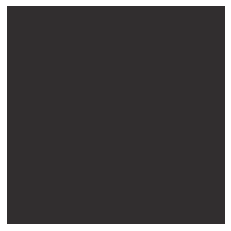

In [22]:
palette = np.array([dominant_color])[np.newaxis, :, :]
plt.imshow(palette);
plt.axis('off');